<a href="https://colab.research.google.com/github/202311003/idm_assignment_1/blob/202311062/DM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm


In [3]:
df=pd.read_csv('/content/drive/MyDrive/dataminning/project 1/archive (8)/the weather of 187 countries in 2020.csv')

<ipython-input-3-e80764f0a2cd>:1: DtypeWarning: Columns (16,17,18,19,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/dataminning/project 1/archive (8)/the weather of 187 countries in 2020.csv')


In [4]:
df.head()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,LONGITUDE,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392570,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True
1392571,False,False,False,False,False,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
1392572,False,False,False,False,False,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
1392573,False,False,False,False,False,False,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True


In [6]:
df.shape

(1392575, 23)

In [7]:
df.columns

Index(['STATION', 'Country/Region', 'DATE', 'Year', 'Month', 'Day', 'PRCP',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'SNOW', 'LATITUDE', 'LONGITUDE',
       'ELEVATION', 'PRCP_ATTRIBUTES', 'TAVG_ATTRIBUTES', 'TMAX_ATTRIBUTES',
       'TMIN_ATTRIBUTES', 'DAPR', 'MDPR', 'WESD', 'SNWD_ATTRIBUTES'],
      dtype='object')

In [8]:
df.describe()

,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,SNOW,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,WESD
count,1392575.0,1.392575e+06,1.392575e+06,1.043369e+06,377429.000000,878632.000000,866705.000000,898381.000000,105392.000000,104742.000000,104742.000000,104742.000000,1293.000000,81.000000,2.000000
mean,2020.0,4.279517e+00,1.595168e+01,2.564688e+00,120.712848,14.814992,17.412551,7.093554,3.742760,37.689351,71.371220,787.542437,5.292343,0.958025,0.050000
std,0.0,1.812637e+00,8.770296e+00,8.035237e+00,293.874318,13.063075,12.707588,12.227766,19.093372,11.572761,71.760255,1094.757321,7.121322,1.653137,0.070711
min,2020.0,1.000000e+00,1.000000e+00,0.000000e+00,-20.000000,-56.200000,-55.000000,-65.000000,0.000000,-17.817000,-140.850000,0.600000,1.000000,0.000000,0.000000
25%,2020.0,3.000000e+00,8.000000e+00,0.000000e+00,0.000000,6.700000,8.400000,0.000000,0.000000,30.667000,75.983000,68.000000,2.000000,0.000000,0.025000
50%,2020.0,4.000000e+00,1.600000e+01,0.000000e+00,0.000000,16.800000,18.500000,7.700000,0.000000,37.850000,104.500000,250.000000,3.000000,0.280000,0.050000
75%,2020.0,6.000000e+00,2.400000e+01,1.500000e+00,99.000000,25.600000,27.222222,15.600000,0.000000,45.217000,116.117000,1099.000000,5.000000,1.510000,0.075000
max,2020.0,7.000000e+00,3.100000e+01,4.849000e+02,52900.000000,43.300000,51.200000,36.700000,625.000000,82.500000,131.983000,4701.000000,61.000000,9.240000,0.100000


In [9]:
country = df['Country/Region'].unique()
country

array(['Comoros', 'Georgia', 'Nepal', 'Philippines', 'Monaco', 'US',
       'Australia', 'Namibia', 'Saint Lucia', 'Lebanon', 'Zambia',
       'Malaysia', 'Peru', 'Kenya', 'Belarus', 'Iceland', 'Lesotho',
       'Venezuela', 'Albania', 'Tanzania', 'Greece', 'Barbados',
       'Singapore', 'Switzerland', 'Sri Lanka', 'China', 'Gabon',
       'Guinea-Bissau', 'Congo (Brazzaville)', 'United Arab Emirates',
       'Tajikistan', 'Syria', 'Lithuania', 'Paraguay', 'Romania',
       'Maldives', 'Jamaica', 'Kuwait', 'Finland', 'Argentina',
       'Ethiopia', 'Japan', 'Cameroon', 'Bhutan', 'Botswana', 'Pakistan',
       'Brazil', 'Madagascar', 'Eritrea', 'Liberia', 'Mali', 'Thailand',
       'Egypt', 'Ireland', 'Belgium', 'Luxembourg', 'Fiji', 'Italy',
       'Greenland', 'Antigua and Barbuda',
       'Saint Vincent and the Grenadines', 'Andorra', 'Guinea', 'Nigeria',
       'Ecuador', 'Guatemala', 'Afghanistan', 'Suriname', 'Djibouti',
       'Uganda', 'Niger', 'Israel', 'Russia', 'Chile', 'Mex

In [10]:
country.shape

(187,)

In [11]:
st = df['STATION'].unique()
st

array(['TZ000063894', 'TZ000063971', 'TZ000063862', ..., 'SPE00120485',
       'SPE00156090', 'SPE00120368'], dtype=object)

In [12]:
st.shape

(6911,)

In [13]:
df.isnull().sum()

STATION                  0
Country/Region           0
DATE                     0
Year                     0
Month                    0
Day                      0
PRCP                349206
SNWD               1015146
TAVG                513943
TMAX                525870
TMIN                494194
SNOW               1287183
LATITUDE           1287833
LONGITUDE          1287833
ELEVATION          1287833
PRCP_ATTRIBUTES    1386568
TAVG_ATTRIBUTES    1388725
TMAX_ATTRIBUTES    1386938
TMIN_ATTRIBUTES    1386701
DAPR               1391282
MDPR               1392494
WESD               1392573
SNWD_ATTRIBUTES    1392221
dtype: int64

In [14]:
df1 = df.drop(['ELEVATION', 'PRCP_ATTRIBUTES','TAVG_ATTRIBUTES','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES','DAPR','MDPR','WESD','SNWD_ATTRIBUTES','Year','SNOW','LATITUDE','LONGITUDE','SNWD'], axis=1)

In [15]:
df1.columns

Index(['STATION', 'Country/Region', 'DATE', 'Month', 'Day', 'PRCP', 'TAVG',
       'TMAX', 'TMIN'],
      dtype='object')

In [16]:
df1.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP              349206
TAVG              513943
TMAX              525870
TMIN              494194
dtype: int64

In [17]:
import matplotlib.pyplot as plt


In [18]:
dfnew = df1.copy()
average_temp = dfnew.groupby(['Country/Region','STATION','Month'])['TAVG'].median().to_dict()
average_temp_min = dfnew.groupby(['Country/Region','STATION','Month'])['TMIN'].median().to_dict()
average_temp_max = dfnew.groupby(['Country/Region','STATION','Month'])['TMAX'].median().to_dict()
average_prcp = dfnew.groupby(['Country/Region','STATION','Month'])['PRCP'].median().to_dict()
print(len(average_temp_min))
print(len(average_temp_max))
print(len(average_temp))
print(len(average_prcp))

53299
53299
53299
53299


In [19]:
dfnew.shape

(1392575, 9)

<ipython-input-20-219072a17b51>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfnew.corr())


<Axes: >

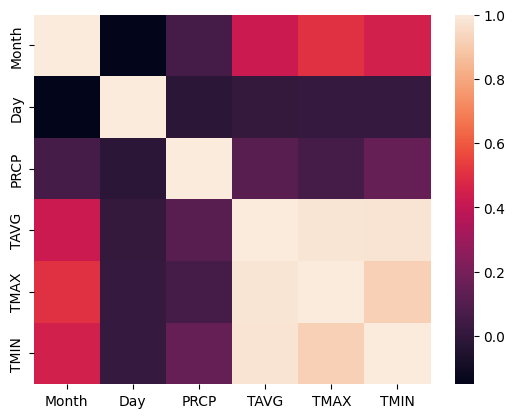

In [20]:
sns.heatmap(dfnew.corr())

In [21]:
def fill_missing(row,temp_type):
    key = (row['Country/Region'], row['Month'])
    if(temp_type == 'TAVG'):
      return average_temp.get(key, row[temp_type])
    elif(temp_type == 'TMIN'):
      return average_temp_min.get(key, row[temp_type])
    elif(temp_type == 'PRCP'):
      return average_prcp.get(key, row[temp_type])
    else:
      return average_temp_max.get(key, row[temp_type])


#dfnew['TAVG'] = dfnew.apply(fill_missing, args=['TAVG'] ,axis = 1)
#dfnew['TMIN'] = dfnew.apply(fill_missing, args=['TMIN'] ,axis = 1)
#dfnew['TMAX'] = dfnew.apply(fill_missing, args=['TMAX'] ,axis = 1)
#dfnew['PRCP'] = dfnew.apply(fill_missing, args=['PRCP'] ,axis = 1)
dfnew.fillna(method='ffill', inplace=True)

dfnew.isnull().sum()

STATION           0
Country/Region    0
DATE              0
Month             0
Day               0
PRCP              0
TAVG              0
TMAX              0
TMIN              0
dtype: int64

STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP              349206
TAVG              513943
TMAX              525870
TMIN              494194
dtype: int64


<Axes: >

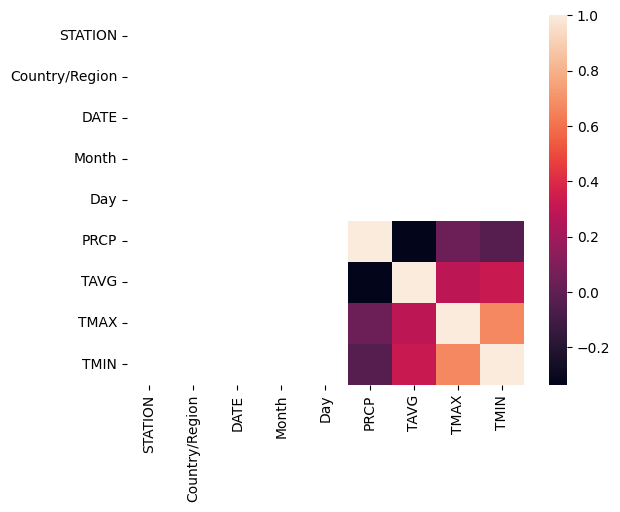

In [22]:
missing=df1.isnull()
print(missing.sum())
sns.heatmap(missing.corr())

In [23]:

df_final=df1.dropna()

In [24]:
df_final.isnull().sum()

STATION           0
Country/Region    0
DATE              0
Month             0
Day               0
PRCP              0
TAVG              0
TMAX              0
TMIN              0
dtype: int64

In [25]:
df_final.shape

(402632, 9)

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_final['Country/Region'] = label_encoder.fit_transform(df_final['Country/Region'])

print(df_final)

             STATION  Country/Region        DATE  Month  Day  PRCP  TAVG  \
0        TZ000063894              35  2020-01-22      1   22  10.9  27.6   
2        TZ000063894              35  2020-01-24      1   24   9.4  27.9   
3        TZ000063894              35  2020-01-25      1   25   0.3  27.9   
7        TZ000063894              35  2020-01-29      1   29   5.1  28.6   
27       TZ000063894              35  2020-02-18      2   18   0.3  29.4   
...              ...             ...         ...    ...  ...   ...   ...   
1392257  COM00080009              34  2020-03-19      3   19   0.0  29.8   
1392258  COM00080009              34  2020-03-20      3   20   0.0  29.8   
1392261  COM00080009              34  2020-03-23      3   23   0.0  29.5   
1392424  COM00080091              34  2020-02-27      2   27   0.5  28.7   
1392427  COM00080091              34  2020-03-01      3    1   0.0  31.8   

         TMAX  TMIN  
0        30.2  24.9  
2        30.6  25.6  
3        30.2  16.3  

<ipython-input-26-21fd96c83560>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Country/Region'] = label_encoder.fit_transform(df_final['Country/Region'])


In [27]:
df_final.head()

,STATION,Country/Region,DATE,Month,Day,PRCP,TAVG,TMAX,TMIN
0,TZ000063894,35,2020-01-22,1,22,10.9,27.6,30.2,24.9
2,TZ000063894,35,2020-01-24,1,24,9.4,27.9,30.6,25.6
3,TZ000063894,35,2020-01-25,1,25,0.3,27.9,30.2,16.3
7,TZ000063894,35,2020-01-29,1,29,5.1,28.6,32.5,26.0
27,TZ000063894,35,2020-02-18,2,18,0.3,29.4,34.0,25.7


In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_final['STATION'] = label_encoder.fit_transform(df_final['STATION'])

print(df_final)

         STATION  Country/Region        DATE  Month  Day  PRCP  TAVG  TMAX  \
0           3078              35  2020-01-22      1   22  10.9  27.6  30.2   
2           3078              35  2020-01-24      1   24   9.4  27.9  30.6   
3           3078              35  2020-01-25      1   25   0.3  27.9  30.2   
7           3078              35  2020-01-29      1   29   5.1  28.6  32.5   
27          3078              35  2020-02-18      2   18   0.3  29.4  34.0   
...          ...             ...         ...    ...  ...   ...   ...   ...   
1392257     1274              34  2020-03-19      3   19   0.0  29.8  35.9   
1392258     1274              34  2020-03-20      3   20   0.0  29.8  35.7   
1392261     1274              34  2020-03-23      3   23   0.0  29.5  35.2   
1392424     1281              34  2020-02-27      2   27   0.5  28.7  34.2   
1392427     1281              34  2020-03-01      3    1   0.0  31.8  35.2   

         TMIN  
0        24.9  
2        25.6  
3        16.3  

<ipython-input-28-5207936ed0d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['STATION'] = label_encoder.fit_transform(df_final['STATION'])


In [29]:
df_final.head()

,STATION,Country/Region,DATE,Month,Day,PRCP,TAVG,TMAX,TMIN
0,3078,35,2020-01-22,1,22,10.9,27.6,30.2,24.9
2,3078,35,2020-01-24,1,24,9.4,27.9,30.6,25.6
3,3078,35,2020-01-25,1,25,0.3,27.9,30.2,16.3
7,3078,35,2020-01-29,1,29,5.1,28.6,32.5,26.0
27,3078,35,2020-02-18,2,18,0.3,29.4,34.0,25.7


In [30]:
df_use=df_final.copy()

In [31]:
df_to_train = df_use.drop(['DATE','TMIN'], axis=1)

In [32]:
dfnew.head()

,STATION,Country/Region,DATE,Month,Day,PRCP,TAVG,TMAX,TMIN
0,TZ000063894,Comoros,2020-01-22,1,22,10.9,27.6,30.2,24.9
1,TZ000063894,Comoros,2020-01-23,1,23,0.0,26.7,30.2,24.9
2,TZ000063894,Comoros,2020-01-24,1,24,9.4,27.9,30.6,25.6
3,TZ000063894,Comoros,2020-01-25,1,25,0.3,27.9,30.2,16.3
4,TZ000063894,Comoros,2020-01-26,1,26,0.0,28.2,31.5,16.3


<Axes: >

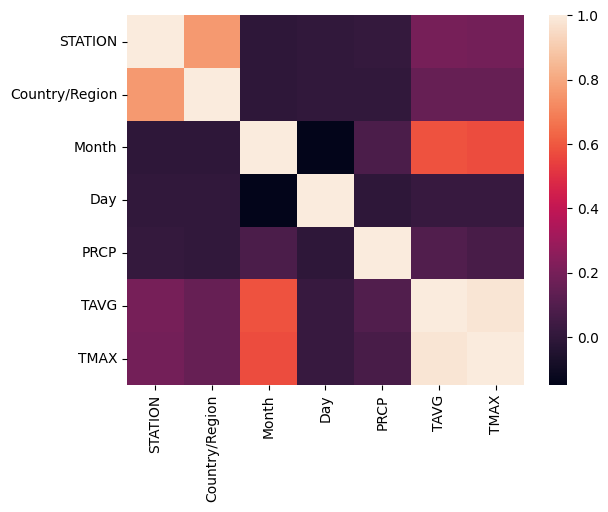

In [33]:
sns.heatmap(df_to_train.corr())

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_to_train, df_use["TMIN"], random_state=42, test_size=0.20)

In [36]:
from sklearn import preprocessing


In [37]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((322105, 7), (80527, 7))

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [39]:
#Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred1 = model1.predict(X_test)

In [42]:
mse1 = mean_squared_error(y_test, y_pred1)
print(mse1)

4.7600037568858635


In [44]:
mae1 = mean_absolute_error(y_test, y_pred1)
mae1

1.5004464035165168

In [45]:
model2 = Lasso(alpha=1.0)
model2.fit(X_train, y_train)

Lasso()

In [47]:
y_pred2 = model2.predict(X_test)

In [48]:
mse2 = mean_squared_error(y_test, y_pred2)
print(mse2)

5.382785144708151


In [49]:
mae2 = mean_absolute_error(y_test, y_pred2)
mae2

1.77429057283514

In [ ]:
df1.shape

(1392575, 12)

In [ ]:
df1 = df.drop(['LATITUDE','LONGITUDE'], axis=1)

In [ ]:
df1.head()

,STATION,Country/Region,DATE,Year,Month,Day,PRCP,SNWD,TAVG,TMAX,...,SNOW,ELEVATION,PRCP_ATTRIBUTES,TAVG_ATTRIBUTES,TMAX_ATTRIBUTES,TMIN_ATTRIBUTES,DAPR,MDPR,WESD,SNWD_ATTRIBUTES
0,TZ000063894,Comoros,2020-01-22,2020,1,22,10.9,NaN,27.6,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TZ000063894,Comoros,2020-01-23,2020,1,23,0.0,NaN,26.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TZ000063894,Comoros,2020-01-24,2020,1,24,9.4,NaN,27.9,30.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TZ000063894,Comoros,2020-01-25,2020,1,25,0.3,NaN,27.9,30.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TZ000063894,Comoros,2020-01-26,2020,1,26,0.0,NaN,28.2,31.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.isnull().sum()

STATION                  0
Country/Region           0
DATE                     0
Year                     0
Month                    0
Day                      0
PRCP                349206
SNWD               1015146
TAVG                513943
TMAX                525870
TMIN                494194
SNOW               1287183
ELEVATION          1287833
PRCP_ATTRIBUTES    1386568
TAVG_ATTRIBUTES    1388725
TMAX_ATTRIBUTES    1386938
TMIN_ATTRIBUTES    1386701
DAPR               1391282
MDPR               1392494
WESD               1392573
SNWD_ATTRIBUTES    1392221
dtype: int64

In [ ]:
occurrences = df1['Country/Region'].value_counts()
print(occurrences)

Canada          254817
Sweden          111499
Germany         103931
Russia           91988
Netherlands      64137
                 ...  
Zimbabwe           166
Sierra Leone       101
Iraq               100
Malawi              74
Zambia              13
Name: Country/Region, Length: 187, dtype: int64


In [ ]:
canada_weather = df1[df1['Country/Region']=='Canada'].copy()

In [ ]:
canada_weather

,STATION,Country/Region,DATE,Month,Day,PRCP,SNWD,TAVG,TMAX,TMIN,LATITUDE,LONGITUDE
797389,CA004016699,Canada,2020-01-22,1,22,0.0,NaN,-8.6,-2.1,-15.2,50.433300,-104.666700
797390,CA1ON000179,Canada,2020-01-22,1,22,0.0,NaN,NaN,NaN,NaN,43.651309,-81.360664
797391,CA1MB000164,Canada,2020-01-22,1,22,0.0,NaN,NaN,NaN,NaN,49.891731,-97.305450
797392,CA001098941,Canada,2020-01-22,1,22,0.0,NaN,-2.1,1.8,-6.0,52.183300,-122.050000
797393,CA1ON000178,Canada,2020-01-22,1,22,0.0,NaN,NaN,NaN,NaN,43.646551,-81.707349
...,...,...,...,...,...,...,...,...,...,...,...,...
1052201,CA1ON000558,Canada,2020-07-27,7,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052202,CA007016470,Canada,2020-07-27,7,27,2.4,0.0,NaN,29.7,22.5,NaN,NaN
1052203,CA1SK000086,Canada,2020-07-27,7,27,0.5,NaN,NaN,NaN,NaN,NaN,NaN
1052204,CA1MB000195,Canada,2020-07-27,7,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
canada_weather.shape

(254817, 12)

<ipython-input-39-065613fcddcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(canada_weather.corr())


<Axes: >

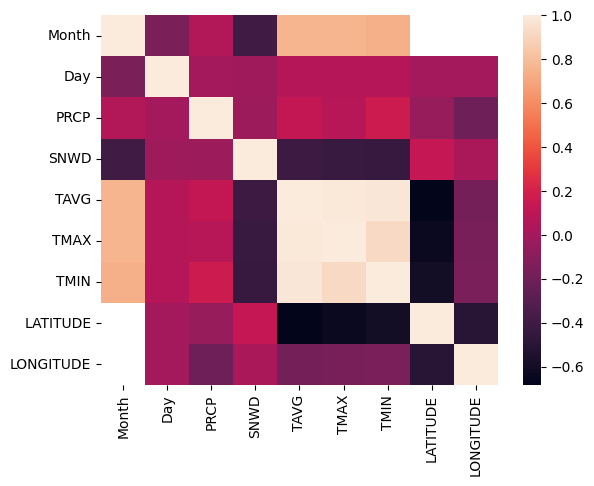

In [ ]:
sns.heatmap(canada_weather.corr())

In [ ]:
canada_weather.isnull().sum()

STATION                0
Country/Region         0
DATE                   0
Month                  0
Day                    0
PRCP               27215
SNWD              160065
TAVG              100701
TMAX               91466
TMIN               91542
LATITUDE          241817
LONGITUDE         241817
dtype: int64

In [ ]:
canada_weather = canada_weather.drop(['SNWD','LATITUDE','LONGITUDE','TMAX','Country/Region','Day','Month'],axis=1)

In [ ]:
canada_weather

,STATION,DATE,PRCP,TAVG,TMIN
797389,CA004016699,2020-01-22,0.0,-8.6,-15.2
797390,CA1ON000179,2020-01-22,0.0,NaN,NaN
797391,CA1MB000164,2020-01-22,0.0,NaN,NaN
797392,CA001098941,2020-01-22,0.0,-2.1,-6.0
797393,CA1ON000178,2020-01-22,0.0,NaN,NaN
...,...,...,...,...,...
1052201,CA1ON000558,2020-07-27,NaN,NaN,NaN
1052202,CA007016470,2020-07-27,2.4,NaN,22.5
1052203,CA1SK000086,2020-07-27,0.5,NaN,NaN
1052204,CA1MB000195,2020-07-27,NaN,NaN,NaN
